**Task 3: Data Processing with Sparks and Hive**

In [10]:
pip install pyspark findspark

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Initialize spark in the notebook
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("StoreCustomerAnalysis") \
    .enableHiveSupport() \
    .getOrCreate()

**Data wrangling with Pyspark**

In [ ]:
# For local CSV
df = spark.read.csv("store_customers.csv", header=True, inferSchema=True)

# For HDFS (if configured)
# df = spark.read.csv("hdfs://namenode:9000/data/store_customers.csv", header=True, inferSchema=True)

df.show(5)
df.printSchema()

In [ ]:
# Cast to integer
from pyspark.sql.functions import col

df = df.withColumn("Annual_Income", col("Annual_Income").cast("int"))
df = df.withColumn("Spending_Score", col("Spending_Score").cast("int"))

# Filter high spenders
high_spenders = df.filter(col("Spending_Score") > 80)
high_spenders.show()

In [ ]:
df.write.mode("overwrite").saveAsTable("store_customers")

**Run HiveQL-style Queries Using Spark SQL**

In [ ]:
# Total customers
spark.sql("SELECT COUNT(*) FROM store_customers").show()

# Average income
spark.sql("SELECT AVG(Annual_Income) FROM store_customers").show()

# Gender distribution
spark.sql("SELECT Gender, COUNT(*) FROM store_customers GROUP BY Gender").show()

# Top 5 high spenders
spark.sql("SELECT * FROM store_customers ORDER BY Spending_Score DESC LIMIT 5").show()

**Task 4 Advanced Analytics and Machine Learning**

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\rsath\OneDrive\Documents\store_customers.csv")
df.head()

,CustomerID,Age,Salary,Gender,Country
0,1,72,20000,Male,Germany
1,2,72,22000,Female,France
2,3,70,24000,Female,England
3,4,75,2600,Male,England
4,5,33,50000,Male,France


In [7]:
# Step 1: Create binary target variable based on median salary
median_salary = df['Salary'].median()
df['HighSalary'] = (df['Salary'] >= median_salary).astype(int)

In [9]:
# Step 2: Encode categorical variables
le_gender = LabelEncoder()
le_country = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Country'] = le_country.fit_transform(df['Country'])

In [11]:
# Step 3: Select features and target
features = ['Age', 'Gender', 'Country']
X = df[features]
y = df['HighSalary']

In [13]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Step 5: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Step 6: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [19]:
# Step 7: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")


Accuracy: 0.522
Precision: 0.555
Recall: 0.659
F1 Score: 0.603
ROC AUC: 0.518


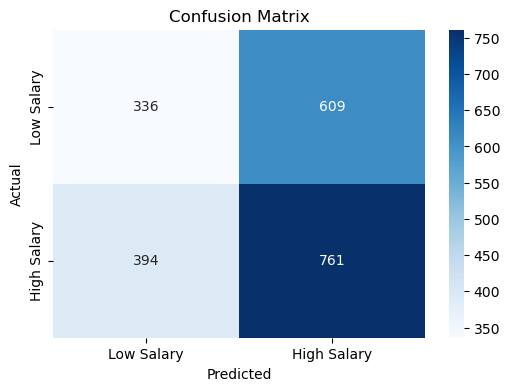

In [21]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Low Salary', 'High Salary'], 
            yticklabels=['Low Salary', 'High Salary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

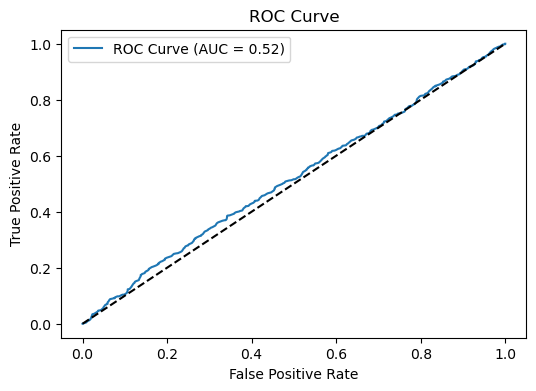

In [23]:
# Step 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

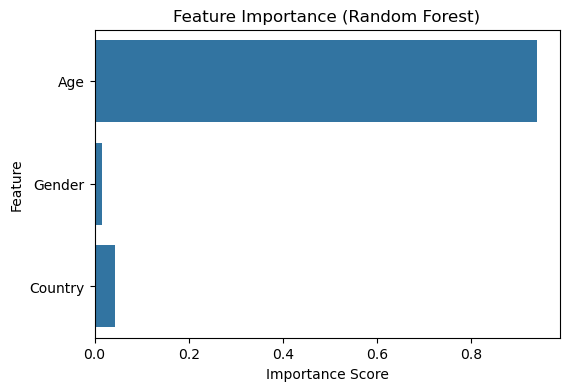

In [25]:
# Step 10: Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()